In [2]:
import numpy as np
import healpy as hp
import pymaster as nmt
import pysm3
import pysm3.units as u
import matplotlib.pyplot as plt

In [27]:
sky = pysm3.Sky(512, preset_strings=['d1'], output_unit='uK_CMB')
Ampl = sky.get_emission(402 * u.GHz).value
Amplcplx = Ampl[1] + 1j * Ampl[2]
dust = sky.components[0]
beta_map = dust.mbb_index.value
T_map = dust.mbb_temperature.value

In [30]:
beta_bar = 1.54
T_bar = 20

w1b = Amplcplx * (beta_map - beta_bar)

mask = hp.read_map('../masks/mask_fsky0.7_nside512_aposcale10.npy')

In [35]:
f = nmt.NmtField(mask, None, spin=2, purify_b=True, lmax=2*512)

b1 = nmt.NmtBin.from_lmax_linear(2*512, nlb=1, is_Dell=True)
w1 = nmt.NmtWorkspace()
w1.compute_coupling_matrix(f, f, b1)

b10 = nmt.NmtBin.from_lmax_linear(2*512, nlb=10, is_Dell=True)
w10 = nmt.NmtWorkspace()
w10.compute_coupling_matrix(f, f, b10)

In [46]:
f1 = nmt.NmtField(mask, [Amplcplx.real, Amplcplx.imag], purify_b=True)
f2 = nmt.NmtField(mask, [w1b.real, w1b.imag], purify_b=True)
Aw1b_1 = nmt.compute_coupled_cell(f2, f2)
Aw1b_1 = w1.decouple_cell(Aw1b_1)[3]

f1 = nmt.NmtField(mask, [Amplcplx.real, Amplcplx.imag], purify_b=True)
f2 = nmt.NmtField(mask, [w1b.real, w1b.imag], purify_b=True)
Aw1b_10 = nmt.compute_coupled_cell(f2, f2)
Aw1b_10 = w10.decouple_cell(Aw1b_10)[3]

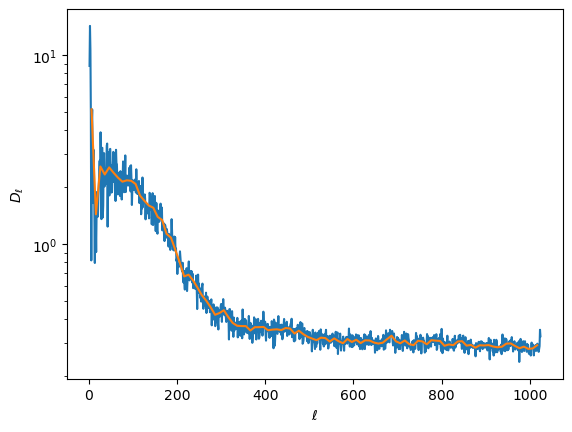

In [47]:
l1 = b1.get_effective_ells()
l10 = b10.get_effective_ells()

plt.plot(l1, np.abs(Aw1b_1))
plt.plot(l10, np.abs(Aw1b_10))
plt.yscale('log')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell$')
plt.show()